In [1]:
import getpass, os

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"Enter {var}: ")

_set_env("OPENAI_API_KEY")
_set_env("TAVILY_API_KEY")

In [14]:
from tavily import TavilyClient

tavil_client = TavilyClient()


In [7]:
response = tavil_client.search("what is ai agent?", max_results=3)
print(response["results"])

[{'url': 'https://aws.amazon.com/what-is/ai-agents/', 'title': 'What are AI Agents? - Artificial Intelligence - AWS', 'content': '# What are AI Agents? What are AI Agents? What are the challenges of using AI agents? ## What are AI Agents? An artificial intelligence (AI) agent is a software program that can interact with its environment, collect data, and use that data to perform self-directed tasks that meet predetermined goals. The AI agent applies the data to make an informed decision. AI agents work by simplifying and automating complex tasks. AI agents require information to execute tasks they have planned successfully. With sufficient data, the AI agent methodically implements the task at hand. ## What are the challenges of using AI agents? Training and deploying deep learning AI agents require substantial computing resources.', 'score': 0.92491204, 'raw_content': None}, {'url': 'https://github.com/resources/articles/ai/what-are-ai-agents', 'title': 'What are AI agents? - GitHub',

In [4]:
answer = tavil_client.get_search_context("what is ai agent?")
print(answer)

[{"url": "https://aws.amazon.com/what-is/ai-agents/", "content": "# What are AI Agents? What are AI Agents? What are the challenges of using AI agents? ## What are AI Agents? An artificial intelligence (AI) agent is a software program that can interact with its environment, collect data, and use that data to perform self-directed tasks that meet predetermined goals. The AI agent applies the data to make an informed decision. AI agents work by simplifying and automating complex tasks. AI agents require information to execute tasks they have planned successfully. With sufficient data, the AI agent methodically implements the task at hand. ## What are the challenges of using AI agents? Training and deploying deep learning AI agents require substantial computing resources."}, {"url": "https://www.ibm.com/think/topics/ai-agents", "content": "# What are AI agents? ## What are AI agents? The agent's ability to store past interactions in memory and plan future actions encourages a personalized

In [5]:
answer = tavil_client.qna_search("what is ai agent?")
print(answer)

An AI agent is an autonomous system that performs tasks and makes decisions independently. It uses artificial intelligence to adapt and operate without constant human intervention. AI agents often utilize large language models to achieve complex goals.


In [8]:
from langchain_tavily import TavilySearch

tool = TavilySearch(max_results=3)
tool.invoke("what is ai agent?")

{'query': 'what is ai agent?',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://aws.amazon.com/what-is/ai-agents/',
   'title': 'What are AI Agents? - Artificial Intelligence - AWS',
   'content': '# What are AI Agents? What are AI Agents? What are the challenges of using AI agents? ## What are AI Agents? An artificial intelligence (AI) agent is a software program that can interact with its environment, collect data, and use that data to perform self-directed tasks that meet predetermined goals. The AI agent applies the data to make an informed decision. AI agents work by simplifying and automating complex tasks. AI agents require information to execute tasks they have planned successfully. With sufficient data, the AI agent methodically implements the task at hand. ## What are the challenges of using AI agents? Training and deploying deep learning AI agents require substantial computing resources.',
   'score': 0.92491204,
   'raw_content': N

In [16]:
from langchain_community.tools.tavily_search import TavilySearchResults

tool = TavilySearchResults(max_results=3)
tool.invoke("what is ai agent?")


[{'url': 'https://www.ibm.com/think/topics/ai-agents',
  'content': '# What are AI agents?\n\n## Authors\n\nAnna Gutowska \n\nAI Engineer, Developer Advocate\n\n## What are AI agents?\n\nAn artificial intelligence (AI) agent is a system that autonomously performs tasks by designing workflows with available tools.\n\nAI agents can encompass a wide range of functions beyond natural language processing including decision-making, problem-solving, interacting with external environments and performing actions. [...] With the ongoing advancements in generative AI and machine learning, there is a growing interest in workflow optimization through AI, or intelligent automation. AI agents are AI tools that can automate complex tasks that would otherwise require human resources. This shift translates to goals being reached inexpensively, rapidly and at scale. In turn, these advancements mean human agents do not need to provide direction to the AI assistant for creating and navigating its tasks.'},

In [17]:
invoke_with_toolcall = tool.invoke({"args": {'query' : "what is ai agent?"}, "type": "tool_call", "id": "foo", "name": "tavily_search"})
invoke_with_toolcall

ToolMessage(content='[{"url": "https://www.ibm.com/think/topics/ai-agents", "content": "# What are AI agents?\\n\\n## Authors\\n\\nAnna Gutowska \\n\\nAI Engineer, Developer Advocate\\n\\n## What are AI agents?\\n\\nAn artificial intelligence (AI) agent is a system that autonomously performs tasks by designing workflows with available tools.\\n\\nAI agents can encompass a wide range of functions beyond natural language processing including decision-making, problem-solving, interacting with external environments and performing actions. [...] With the ongoing advancements in generative AI and machine learning, there is a growing interest in workflow optimization through AI, or intelligent automation. AI agents are AI tools that can automate complex tasks that would otherwise require human resources. This shift translates to goals being reached inexpensively, rapidly and at scale. In turn, these advancements mean human agents do not need to provide direction to the AI assistant for creati

In [16]:
invoke_with_toolcall.content

'[{"title": "What Are AI Agents? | IBM", "url": "https://www.ibm.com/think/topics/ai-agents", "content": "# What are AI agents?\\n\\n## Authors\\n\\nAnna Gutowska \\n\\nAI Engineer, Developer Advocate\\n\\n## What are AI agents?\\n\\nAn artificial intelligence (AI) agent is a system that autonomously performs tasks by designing workflows with available tools.\\n\\nAI agents can encompass a wide range of functions beyond natural language processing including decision-making, problem-solving, interacting with external environments and performing actions. [...] With the ongoing advancements in generative AI and machine learning, there is a growing interest in workflow optimization through AI, or intelligent automation. AI agents are AI tools that can automate complex tasks that would otherwise require human resources. This shift translates to goals being reached inexpensively, rapidly and at scale. In turn, these advancements mean human agents do not need to provide direction to the AI as

In [17]:
invoke_with_toolcall.artifact

{'query': 'what is ai agent?',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://www.ibm.com/think/topics/ai-agents',
   'title': 'What Are AI Agents? | IBM',
   'content': '# What are AI agents?\n\n## Authors\n\nAnna Gutowska \n\nAI Engineer, Developer Advocate\n\n## What are AI agents?\n\nAn artificial intelligence (AI) agent is a system that autonomously performs tasks by designing workflows with available tools.\n\nAI agents can encompass a wide range of functions beyond natural language processing including decision-making, problem-solving, interacting with external environments and performing actions. [...] With the ongoing advancements in generative AI and machine learning, there is a growing interest in workflow optimization through AI, or intelligent automation. AI agents are AI tools that can automate complex tasks that would otherwise require human resources. This shift translates to goals being reached inexpensively, rapidly and at 

In [ ]:
from langchain_core.tools import tool
from langchain_community.tools.tavily_search import TavilySearchResults

@tool
def add(a: int, b: int) -> int:
    """Add two numbers together"""
    return a + b

@tool
def multiply(a: int, b: int) -> int:
    """Multiply two numbers together"""
    return a * b

tools = [add, multiply]


In [4]:
from langchain_openai import ChatOpenAI

# bind tool: 툴을 호출할 준비를 해주는 메서드
llm = ChatOpenAI(model="gpt-4o-mini")
llm_with_tools = llm.bind_tools(tools)

In [6]:
# query = "2랑 2를 곱한 더한 갑과 2와 2를 곱한값을 비교해줘"
query = "hi"

llm_with_tools.invoke(query)

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 68, 'total_tokens': 78, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CS0LC3poZb1IxkbPFTIT5GQMoMrcW', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--a6920b21-0c78-4399-9ff5-5f15df29d410-0', usage_metadata={'input_tokens': 68, 'output_tokens': 10, 'total_tokens': 78, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

# 웹검색 기반으로 답변하는 LLM 챗봇 만들기

In [ ]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

def chatbot(state: State):
    # 영화 관련 질문에 대해 구조화된 응답을 위한 시스템 메시지 추가
    messages = state["messages"]
    
    # 영화 관련 질문인지 확인
    last_message = messages[-1].content if messages else ""
    if any(keyword in last_message.lower() for keyword in ["영화", "movie", "film", "cinema"]):
        # 영화 정보를 구조화된 형태로 출력하도록 프롬프트 추가
        system_prompt = """영화에 대한 질문이면 다음 형식으로 답변해주세요:

제목: [영화 제목]
장르: [장르]
개봉년도: [년도]
감독: [감독명]
주요 출연진: [배우들]
줄거리: [간단한 줄거리]
평점: [평점/리뷰]

웹 검색을 통해 최신 정보를 찾아서 답변해주세요."""
        
        enhanced_messages = [{"role": "system", "content": system_prompt}] + messages
        return {"messages": [llm_with_tools.invoke(enhanced_messages)]}
    else:
        return {"messages": [llm_with_tools.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)

In [33]:
from langgraph.prebuilt import ToolNode


# 툴을 실행시켜서 결과값을 전달해주는 노드 ToolNode
tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

- 툴노드로 들어갈지 말지를 결정해주는 부분
- 조건부엣지, 라우팅 (add_conditional_edges)추가

In [34]:
def route_tools(
    state: State,
):
    """
    Use in the conditional edge to route to the ToolNodeif the last message
    has tool calls. Otherwise, route to the end.
    마지막 메시지에 도구 호출이 있는 경우 conditional_edge에서 ToolNode 로 라우팅 하고 그렇지 않으면 END를 라우팅
    """
    # 메시지가 목록인 경우 마지막 메시지를 가져옴
    if isinstance(state, list):
        ai_message = state[-1]
    elif message := state.get("messages", []):
        ai_message = message[-1]
    else:
        raise ValueError(f"No AI message found : {state}")
    
    # 마지막 메시지에 도구 호출이 있는 경우 ToolNode로 라우팅
    if hasattr(ai_message, "tool_calls") and len(ai_message.tool_calls) > 0:
        return "tools"
    return END

graph_builder.add_conditional_edges(
    "chatbot",
    route_tools,
    {"tools": "tools", END: END}
)


In [36]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("tools", "chatbot")
graph = graph_builder.compile()

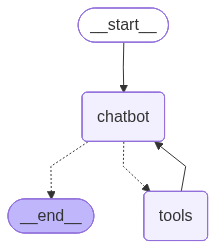

In [37]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [39]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input }]}):
        for value in event.values():
            print("Assistant: ", value["messages"][-1].content)


while True:
    user_input = input("You: ")
    print("User: ", user_input)
    if user_input.lower() in ["quit", "exit", "q"]:
        print("goodbye!")
        break
    stream_graph_updates(user_input)

User:  q
goodbye!
